In [185]:
import pandas as pd
import numpy as np
# from Analytical_Functions import * 
import matplotlib 
from matplotlib import pyplot as plt

'''
what percentage of family income are remittances? by country? by urban/rural?
 - main_table.remittances_yn, main_table.remesa_amount, main_table.remesa_currency, 
 - looking at cash assistance only
 - main_table.exp_currency, .exp_monthly_* (monthly expense amounts)
 - main_table.exp_6months_currency, main_table.exp_6months_*
 - main_table.hh_income_first* second* third*
 - main_table.avf)income_consent, _currency, _amount
 (debt_consent, currency, amount)
 - main_table.programs_asistencia_gob
 - main_table. income_per_capita income_per_capita_tier
what percentage of family income goes to food, clothing, schooling, housing, farming inputs? by country? by urban/rural?
 - main_table.remesa_efectivo_uso, main_table.remesa_efectivo_uso_pct (percent of remittance towards x)
what percentage of the GDP on average are remittances? by country?
What amount in remittances does each country receive?
What amount in remittances does the NT receive?

- main_table.rural_urban

'''

In [92]:
main_df = pd.read_csv('data/main_table.csv')
hh_df = pd.read_csv('data/hh_roster.csv')
ext_df = pd.read_csv('data/mig_ext_roster.csv')
lut = pd.read_csv('data/answer_lookup.csv', usecols=[0,1,2,3], index_col='label')
main_lut = pd.read_csv('data/main_lookup.csv', index_col='label')

In [93]:
lut = lut.rename(columns={'text_content':'response'})

In [227]:
def look_up_response_meanings(label):
    print(label)
    if main_lut.loc[label,'type'] in ['c','mc','mco']:
        return lut.loc[label,['name','response']].set_index('name')
    else:
        return lut.loc[main_lut.loc[label,'type'], ['name','response']].set_index('name')
# look_up_response_meanings(label)
def index_with_meaning(df,label):
    new_indexes = df.index.astype(int).astype(str)
#     print(new_indexes)
    if main_lut.loc[label,'type'] in ['c','mc','mco']:
        pass
    else:
#         print(main_lut.loc[label,'type'])
        response_meanings = lut.loc[main_lut.loc[label,'type'], ['name','response']].set_index('name')
    return response_meanings.loc[new_indexes,'response']

#### What percentage of family income are remittances? by country? by urban/rural?

In [24]:
label = 'avg_income_consent'

In [218]:
avg_income_consent_df = main_df.avg_income_consent.value_counts().to_frame()
avg_income_consent_df.index = index_with_meaning(avg_income_consent_df,label)
avg_income_consent_df

,avg_income_consent
response,
Yes,3083
Not,1245
NS / NR,670


In [14]:
#NS/NR (99) means No Sabe/No Responde 
#(Spanish: Do Not Know/Does Not Answer; surveys)

In [156]:
df = main_df.avg_income_currency.to_frame()
df['avg_income_amount'] = main_df.avg_income_amount
# Use the conversion rate 1 Guatemalan Quetzals to 0.13 U.S. Dollar.
# Use the conversion rate 1 Honduram Lempiras to 0.041 U.S. Dollar.

In [255]:
df['avg_income_consent'] = main_df.avg_income_consent

In [157]:
df

,avg_income_currency,avg_income_amount
0,NaN,NaN
1,1.0,500.0
2,1.0,300.0
3,1.0,350.0
4,1.0,347.0
...,...,...
4993,3.0,260.0
4994,3.0,247.0
4995,3.0,650.0
4996,3.0,65.0


In [151]:
look_up_response_meanings('avg_income_currency')

avg_income_currency


,response
name,
1,Dollars
2,Lempiras
3,Quetzals


In [116]:
def convert_to_usd(currency, amount):
    if currency == 1:
        return amount
    elif currency == 2:
        return (.13 * amount)
    elif currency == 3:
        return (.041 * amount)

In [158]:
df['AVG_INCOME_USD'] = df.apply(lambda x: convert_to_usd(x['avg_income_currency'],x['avg_income_amount']),axis=1)

In [159]:
df

,avg_income_currency,avg_income_amount,AVG_INCOME_USD
0,NaN,NaN,NaN
1,1.0,500.0,500.000
2,1.0,300.0,300.000
3,1.0,350.0,350.000
4,1.0,347.0,347.000
...,...,...,...
4993,3.0,260.0,10.660
4994,3.0,247.0,10.127
4995,3.0,650.0,26.650
4996,3.0,65.0,2.665


In [207]:
print(f"Avg Household Income per month among those that consented (n={avg_income_consent_df.loc['Yes','avg_income_consent']}/{df.sum()[0]}) in USD: {np.round(df.AVG_INCOME_USD.mean(),2)}. Std: {np.round(df.AVG_INCOME_USD.std(),2)}")


Avg Household Income per month among those that consented (n=3083/6165.0) in USD: 121.99. Std: 237.25


In [162]:
df['country'] = main_df.country
df['rural_urban'] = main_df.rural_urban

In [163]:
df

,avg_income_currency,avg_income_amount,AVG_INCOME_USD,country,rural_urban
0,NaN,NaN,NaN,SLV,2
1,1.0,500.0,500.000,SLV,2
2,1.0,300.0,300.000,SLV,2
3,1.0,350.0,350.000,SLV,2
4,1.0,347.0,347.000,SLV,2
...,...,...,...,...,...
4993,3.0,260.0,10.660,GT,2
4994,3.0,247.0,10.127,GT,2
4995,3.0,650.0,26.650,GT,2
4996,3.0,65.0,2.665,GT,2


In [150]:
look_up_response_meanings('rural_urban')

rural_urban


,response
name,
1,Rural
2,Urban


#### Total amount of Remittances in the NT 

In [164]:
main_df.remittances_yn

0       0
1       1
2       0
3       0
4       0
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: remittances_yn, Length: 4998, dtype: int64

In [208]:
remitt_yn_df = main_df.remittances_yn.value_counts().to_frame()
remitt_yn_df.index = index_with_meaning(remitt_yn_df,'remittances_yn')
remitt_yn_df

,remittances_yn
response,
Not,3532
Yes,1447
NS / NR,19


In [235]:
main_df.shape[0] - remitt_yn_df.sum()

remittances_yn    0
dtype: int64

In [229]:
remitt_consent_df = main_df.remesa_amount_consent.value_counts().to_frame()
# remitt_consent_df.index = remitt_consent_df.index.astype(str)
remitt_consent_df.index = index_with_meaning(remitt_consent_df,'remesa_amount_consent')
remitt_consent_df

,remesa_amount_consent
response,
Yes,1027
Not,271
NS / NR,117


In [234]:
main_df.shape[0] - remitt_consent_df.sum()

remesa_amount_consent    3583
dtype: int64

In [170]:
main_df.remesa_currency.count()

1027

In [172]:
main_df.remesa_amount.count()

1027

In [237]:
df['remittances_yn'] = main_df.remittances_yn
df['remesa_amount_consent'] = main_df.remesa_amount_consent
df['remesa_currency'] = main_df.remesa_currency
df['remesa_amount'] = main_df.remesa_amount
df['REMESA_AMOUNT_USD'] = df.apply(lambda x: convert_to_usd(x['remesa_currency'],x['remesa_amount']),axis=1)


In [181]:
main_df.remesa_freq.value_counts()

3.0     556
4.0     172
5.0     149
6.0     138
2.0     136
8.0     127
7.0      83
1.0      42
9.0      24
99.0     20
Name: remesa_freq, dtype: int64

In [238]:
df['remesa_freq'] = main_df.remesa_freq

In [179]:
look_up_response_meanings('remesa_freq')

remesa_freq


,response
name,
1,Every week or less
2,Every fifteen days
3,Each month
4,Every two months
5,Every three months
6,Every six months
7,Once a year
8,"On extraordinary occasions (celebrations, deat..."
9,Other


In [183]:
#want remesa per month (same as income units)

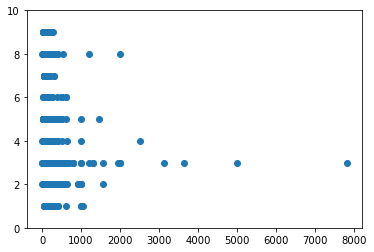

In [191]:
plt.scatter(main_df.remesa_amount,main_df.remesa_freq)
plt.ylim(0,10)
# plt.xlim(0,1000)
plt.show()

In [195]:
def amount_per_month(amount,freq):
    if freq == 1:
        return amount * 4.3
    elif freq == 2:
        return amount * 2
    elif freq == 3:
        return amount
    elif freq == 4 :
        return amount / 2
    elif freq == 5:
        return amount / 3
    elif freq == 6:
        return amount / 6
    elif freq == 7:
        return amount / 12
    else:
        return np.nan #could refine

In [239]:
df['REMESA_AMOUNT_REGPERMONTH'] = df.apply(lambda x: amount_per_month(x['REMESA_AMOUNT_USD'],x['remesa_freq']),axis=1)

In [240]:
df

,avg_income_currency,avg_income_amount,AVG_INCOME_USD,country,rural_urban,remesa_currency,remesa_amount,REMESA_AMOUNT_USD,remesa_freq,REMESA_AMOUNT_REGPERMONTH,remittances_yn,remesa_amount_consent
0,NaN,NaN,NaN,SLV,2,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1.0,500.0,500.000,SLV,2,NaN,NaN,NaN,3.0,NaN,1,0.0
2,1.0,300.0,300.000,SLV,2,NaN,NaN,NaN,NaN,NaN,0,NaN
3,1.0,350.0,350.000,SLV,2,NaN,NaN,NaN,NaN,NaN,0,NaN
4,1.0,347.0,347.000,SLV,2,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3.0,260.0,10.660,GT,2,NaN,NaN,NaN,NaN,NaN,0,NaN
4994,3.0,247.0,10.127,GT,2,NaN,NaN,NaN,NaN,NaN,0,NaN
4995,3.0,650.0,26.650,GT,2,NaN,NaN,NaN,NaN,NaN,0,NaN
4996,3.0,65.0,2.665,GT,2,NaN,NaN,NaN,NaN,NaN,0,NaN


In [207]:
print(f"Avg Household Income per month among those that consented (n={avg_income_consent_df.loc['Yes','avg_income_consent']}/{df.sum()[0]}) in USD: {np.round(df.AVG_INCOME_USD.mean(),2)}. Std: {np.round(df.AVG_INCOME_USD.std(),2)}")


Avg Household Income per month among those that consented (n=3083/6165.0) in USD: 121.99. Std: 237.25


In [250]:
print(f"Avg remittance amount per month among those that receive remittances, consented to sharing amount, and those that receive somewhat frequently (n={df.REMESA_AMOUNT_REGPERMONTH.count()}/{df.shape[0]}) in USD: {np.round(df.REMESA_AMOUNT_REGPERMONTH.mean(),2)}. Std: {np.round(df.REMESA_AMOUNT_REGPERMONTH.std(),2)}")


Avg remittance amount per month among those that receive remittances, consented to sharing amount, and those that receive somewhat frequently (n=927/4998) in USD: 127.16. Std: 347.72


In [266]:
#Avg percent of income that is remittance 
df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1), 'REMESA_AMOUNT_REGPERMONTH'] / df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1), 'AVG_INCOME_USD']

6       0.416667
12      0.166667
13      0.136364
21      0.100000
23      0.277778
          ...   
4962    0.857143
4967    0.750000
4975    2.680247
4986    2.800000
4989    0.250000
Length: 710, dtype: float64

In [267]:
temp.loc[temp > 100]

2941           inf
3702    187.617261
4740    117.260788
dtype: float64

In [271]:
df.loc[2941]

avg_income_currency            1.0
avg_income_amount              0.0
AVG_INCOME_USD                 0.0
country                        SLV
rural_urban                      1
remesa_currency                1.0
remesa_amount                100.0
REMESA_AMOUNT_USD            100.0
remesa_freq                    2.0
REMESA_AMOUNT_REGPERMONTH    200.0
remittances_yn                   1
remesa_amount_consent          1.0
avg_income_consent               1
Name: 2941, dtype: object

In [272]:
remit_and_consents_df = df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1)]

In [276]:
remit_and_consents_df = remit_and_consents_df.drop(index = remit_and_consents_df.loc[remit_and_consents_df['avg_income_amount'] == 0].index)

In [278]:
(remit_and_consents_df['REMESA_AMOUNT_REGPERMONTH'] / remit_and_consents_df['AVG_INCOME_USD']).mean()

2.0195008279580113

In [282]:
remit_and_consents_df.iloc[0]

avg_income_currency            1.0
avg_income_amount            240.0
AVG_INCOME_USD               240.0
country                        SLV
rural_urban                      2
remesa_currency                1.0
remesa_amount                100.0
REMESA_AMOUNT_USD            100.0
remesa_freq                    3.0
REMESA_AMOUNT_REGPERMONTH    100.0
remittances_yn                   1
remesa_amount_consent          1.0
avg_income_consent               1
Name: 6, dtype: object

In [284]:
remit_and_consents_df.iloc[100]

avg_income_currency            1.0
avg_income_amount            120.0
AVG_INCOME_USD               120.0
country                        SLV
rural_urban                      1
remesa_currency                1.0
remesa_amount                120.0
REMESA_AMOUNT_USD            120.0
remesa_freq                    3.0
REMESA_AMOUNT_REGPERMONTH    120.0
remittances_yn                   1
remesa_amount_consent          1.0
avg_income_consent               1
Name: 703, dtype: object

In [285]:
(remit_and_consents_df['REMESA_AMOUNT_REGPERMONTH'] / (remit_and_consents_df['REMESA_AMOUNT_REGPERMONTH']  + remit_and_consents_df['AVG_INCOME_USD'])).mean()

0.3600336014733176

In [288]:
df.to_csv('vars_of_interest_v1.csv')

In [290]:
remit_and_consents_df.country.value_counts()

SLV    338
GT     220
HND    151
Name: country, dtype: int64